# Principal Component Analysis

Below are the Principal Component Analysis on the first 13 features:

1.  index:   Index for each data point
2.  sim:     Index for each simulation
3.  tem:     Temperature of air supplied to the zone (°C)
4.  mass:    Total mass flow rate of air supply to the zone (kg/s)
5.  n:       North Wall Temperature (°C)
6.  w:       West Wall Temperature (°C)
7.  s:       South Wall Temperature (°C)
8.  sw:      South Window Temperature (°C)
9.  e:       East Wall Temperature (°C)
10. ew:      East Window Temperature (°C)
11. floor:   Floor Temperature (°C)
12. ceiling: Ceiling Temperature (°C)
13. n_occ:   Number of occupants in zone
14. x:       location of occupant of interest on x-axis (m)
15. y:       location of occupant of interest on y-axis (m)

The last 3 features are treated as target predictions for evaluation purpose.

1. MRT:  Mean radiant temperature of the occupant of interest’s head and chest (°C)
2. T:    Average temperature of air surrounding the occupant of interest (°C)
3. V:    Average speed of air surrounding the occupant of interest occupant (°C)

In [9]:
data_loc = '../data/preprocessed/'

## Conference Room

### 1. Standardize the data

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

con_room_data = pd.read_csv(data_loc+"conference_room.csv")

# Remove the index column
con_room_data.drop(columns=['index', 'sim'], inplace=True)

# Seperate the data into features and labels
X = con_room_data.drop(columns=['MRT', 'T', 'V'])
y_MRT = con_room_data['MRT']
y_T = con_room_data['T']
y_V = con_room_data['V']

# Standardize the data
scaler = StandardScaler()
scaler.fit(X)

X_std = pd.DataFrame(scaler.transform(X), columns=X.columns)
X_std.describe()


,tem,mass,n,w,s,sw,e,ew,floor,ceiling,n occ,x,y
count,2.095800e+04,2.095800e+04,2.095800e+04,2.095800e+04,2.095800e+04,2.095800e+04,2.095800e+04,2.095800e+04,2.095800e+04,2.095800e+04,2.095800e+04,2.095800e+04,2.095800e+04
mean,-4.310471e-17,-4.757569e-17,8.324540e-16,2.804879e-16,-3.261234e-16,1.493481e-16,-6.394761e-16,8.086702e-17,-3.902229e-16,8.464716e-16,-3.272447e-14,3.813283e-14,-9.820309e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.475736e+00,-1.580859e+00,-2.757295e+00,-2.813610e+00,-2.518167e+00,-2.552468e+00,-2.492894e+00,-2.478706e+00,-2.867409e+00,-2.893951e+00,-1.674496e+00,-1.133249e+00,-1.282534e+00
25%,-8.367246e-01,-7.712921e-01,-4.492384e-01,-6.161947e-01,-4.785246e-01,-5.250738e-01,-5.087353e-01,-4.909610e-01,-4.279673e-01,-4.354616e-01,-8.380860e-01,-1.133249e+00,-1.282534e+00
50%,-1.977131e-01,-1.930300e-01,1.277757e-01,4.825129e-01,3.373321e-01,8.314466e-02,2.849281e-01,1.053624e-01,5.992101e-02,5.479341e-01,8.347336e-01,-2.697370e-01,-2.252214e-01
75%,7.608042e-01,7.321895e-01,7.047898e-01,4.825129e-01,7.452605e-01,6.913631e-01,6.817599e-01,7.016859e-01,5.478093e-01,5.479341e-01,8.347336e-01,9.039089e-01,1.160499e+00
max,4.275367e+00,1.888714e+00,1.281804e+00,1.581220e+00,1.561117e+00,2.516018e+00,1.475423e+00,2.490656e+00,1.523586e+00,1.039632e+00,8.347336e-01,1.773502e+00,1.160499e+00


### 2. Perform PCA

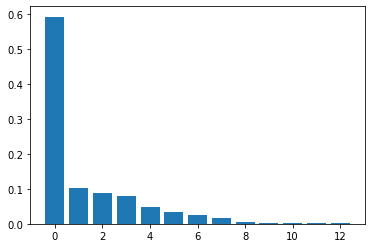

In [11]:
# Perform PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy import savetxt

pca = PCA()
pca.fit(X_std)

e_vectors = pca.components_ # The eigenvectors
evr = pca.explained_variance_ratio_ # The variance explained by each eigenvector

# Save the eigenvectors to a text file
savetxt("../reports/data/pca_conference_room_eigenvectors.csv", e_vectors, delimiter=',')

plt.bar(range(len(evr)), evr)
plt.savefig('../figures/evr_pca_conference_room.png')

/tmp/ipykernel_54312/4093233920.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X_pca.hist(bins=50, ax=ax)


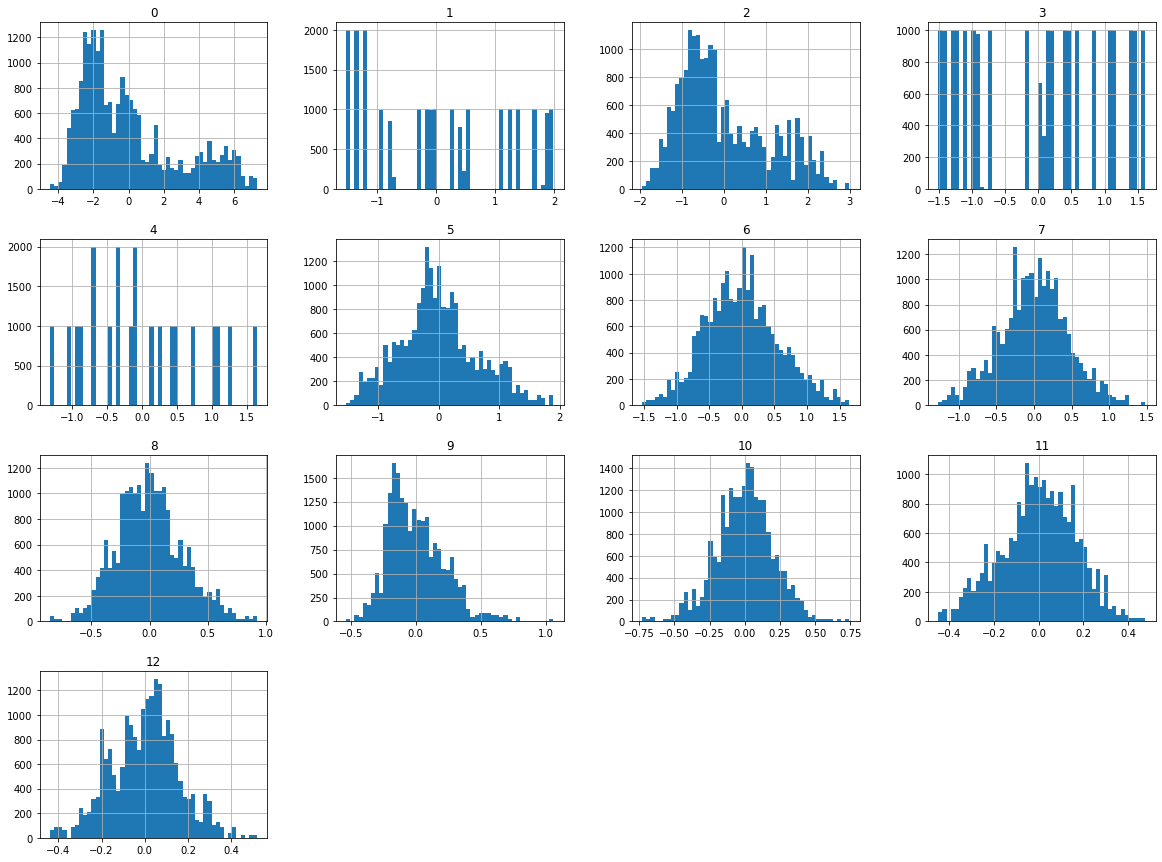

In [12]:
# Tramsform the data
X_pca = pd.DataFrame(pca.transform(X_std))
fig, ax = plt.subplots(figsize=(20,15))
X_pca.hist(bins=50, ax=ax)
fig.savefig('../figures/hist_pca_conference_room.png')

After performing PCA on the features, the distribution graph shows more normal distribution features (8 features).

### 3. Compare models' results with and without PCA on predicting MRT

#### 3.1 Split the data into training and testing

In [13]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

# Without PCA
X_train, X_test, y_train, y_test = train_test_split(X_std, y_MRT, test_size=0.2, random_state=42)

# With PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_MRT, test_size=0.2, random_state=42)

#### 3.2 Train and evaluate the Linear Regression model

##### 3.2.1 Without PCA

Training time: 0.01263737678527832s
Mean squared error: 0.036303047735584584


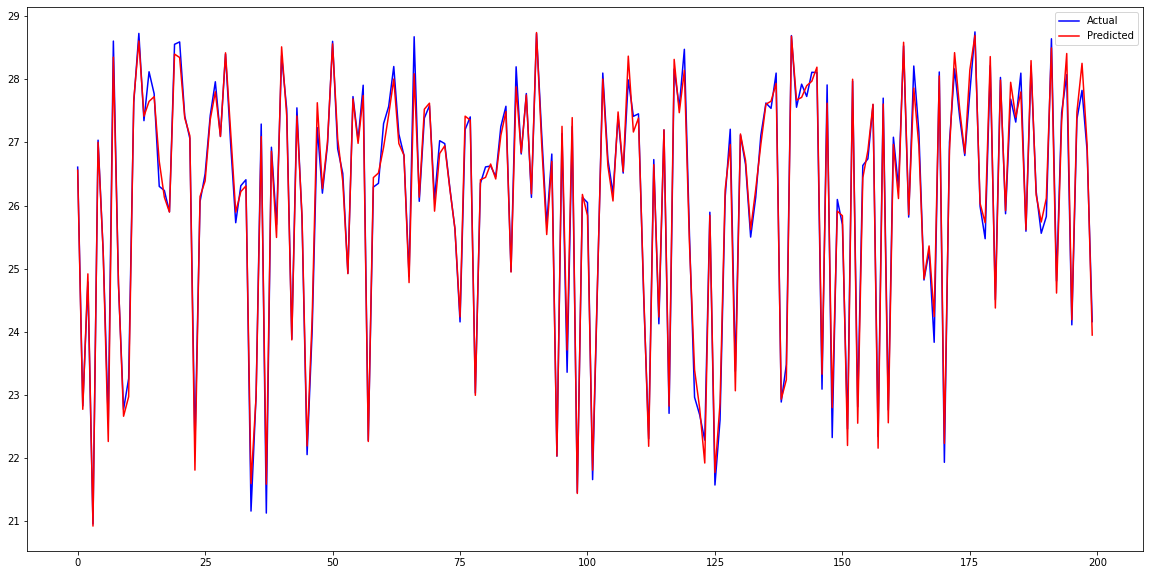

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle
import time

# Train linear regression model on training data
model = LinearRegression()
start = time.time()
model.fit(X_train, y_train)
stop = time.time()
lr_train_time = stop - start
print(f"Training time: {lr_train_time}s")

# Save the model to a pickle file
filename = '../reports/models/lr_MRT_conference_room_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred[:200], color='red', label='Predicted')
plt.legend()
plt.show()

##### 3.2.2 With PCA

Training time: 0.014313220977783203s
Mean squared error: 0.03630304773558465


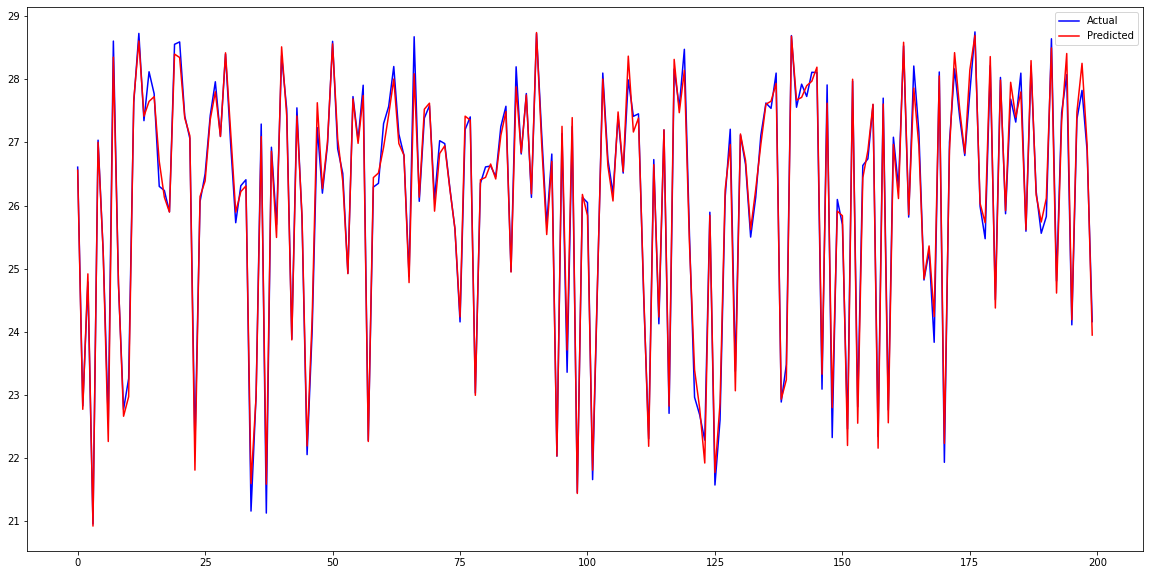

In [15]:
# Train linear regression model on training data
start = time.time()
model.fit(X_train_pca, y_train_pca)
stop = time.time()
lr_pca_train_time = stop - start
print(f"Training time: {lr_pca_train_time}s")

# Predict on test data
y_pred_pca = model.predict(X_test_pca)

# Save the model to a pickle file
filename = '../reports/models/lr_MRT_pca_conference_room_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred_pca)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test_pca[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_pca[:200], color='red', label='Predicted')
plt.legend()
plt.show()

#### 3.3 Train and evaluate the Feedforward Neural Network model

##### 3.2.1 Without PCA

Training time: 190.46492838859558s
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


2022-01-18 14:04:03.738644: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../reports/models/nn_MRT_conference_room_model.pkl/assets
Mean squared error: 0.005940737672679868


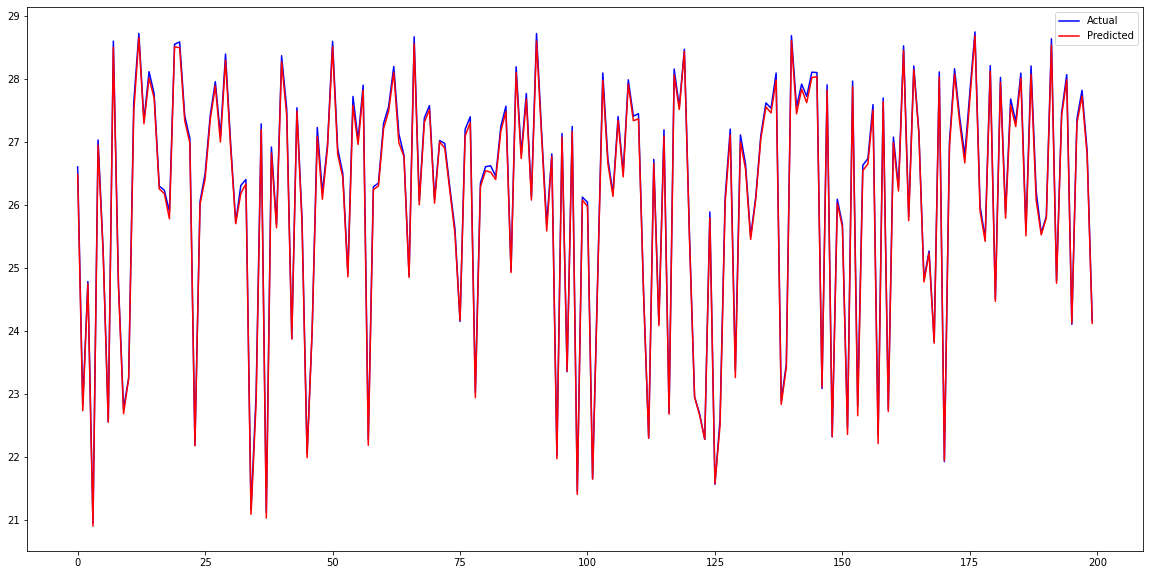

In [16]:
# Create neural network model 
from keras.models import Sequential
from keras.layers import Dense

N_NEURONS = 1024
N_LAYERS = 4

model = Sequential()
model.add(Dense(units=N_NEURONS, input_dim=X.shape[1], activation='relu'))
for i in range(N_LAYERS-1):
    model.add(Dense(units=N_NEURONS, activation='relu'))
model.add(Dense(units=1, activation='linear')) # Output layer
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
start = time.time()
model.fit(X_train, y_train, epochs=100, verbose=0)
stop = time.time()
nn_train_time = stop - start
print(f"Training time: {nn_train_time}s")

# Predict on test data
y_pred_nn = model.predict(X_test)
model.save('../reports/models/nn_MRT_conference_room_model.pkl')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_nn)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_nn[:200], color='red', label='Predicted')
plt.legend()
plt.show()

##### 3.3.2 With PCA

Training time: 200.48521423339844s
INFO:tensorflow:Assets written to: ../reports/models/nn_MRT_pca_conference_room_model.pkl/assets
Mean squared error: 0.0023151260541025287


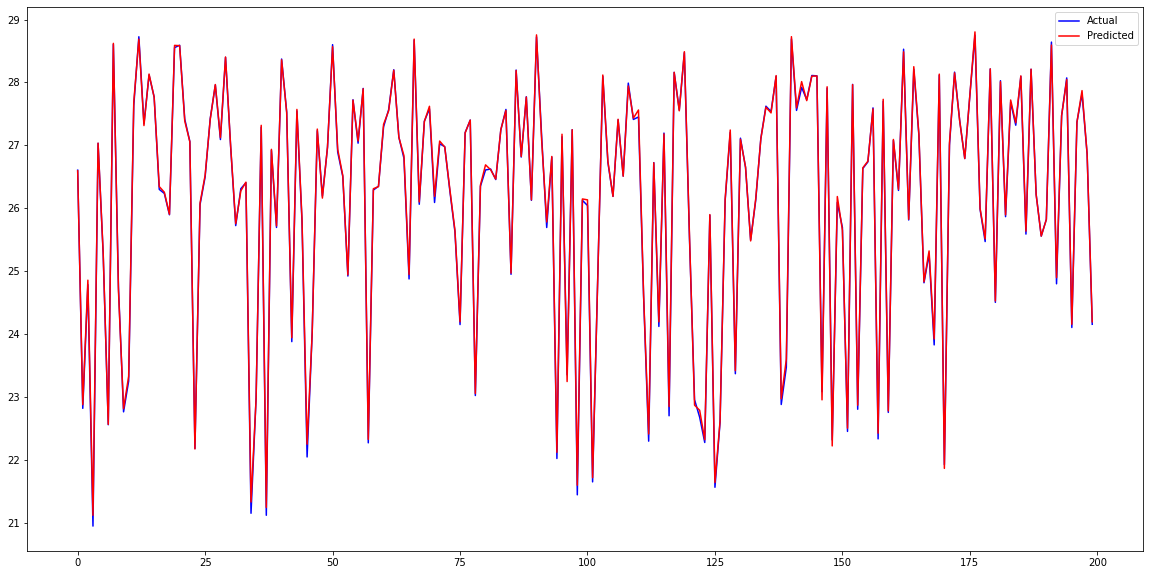

In [17]:
# Train the model
start = time.time()
model.fit(X_train_pca, y_train_pca, epochs=100, verbose=0)
stop = time.time()
nn_pca_train_time = stop - start
print(f"Training time: {nn_pca_train_time}s")

# Predict on test data
y_pred_nn_pca = model.predict(X_test_pca)
model.save('../reports/models/nn_MRT_pca_conference_room_model.pkl')

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred_nn_pca)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test_pca[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_nn_pca[:200], color='red', label='Predicted')
plt.legend()
plt.show()

In [18]:
# Save training times to a csv file
import csv

with open('../reports/data/training_times_conference_room_MRT.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model', 'Training time (s)'])
    writer.writerow(['Linear regression', lr_train_time])
    writer.writerow(['Linear regression with PCA', lr_pca_train_time])
    writer.writerow(['Neural network', nn_train_time])
    writer.writerow(['Neural network with PCA', nn_pca_train_time])

### 4. Compare models' results with and without PCA on predicting T

#### 4.1 Split the data into training and testing

In [19]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

# Without PCA
X_train, X_test, y_train, y_test = train_test_split(X_std, y_T, test_size=0.2, random_state=42)

# With PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_T, test_size=0.2, random_state=42)

#### 4.2 Train and evaluate the Linear Regression model

##### 4.2.1 Without PCA

Training time: 0.009361028671264648s
Mean squared error: 0.13248888237360454


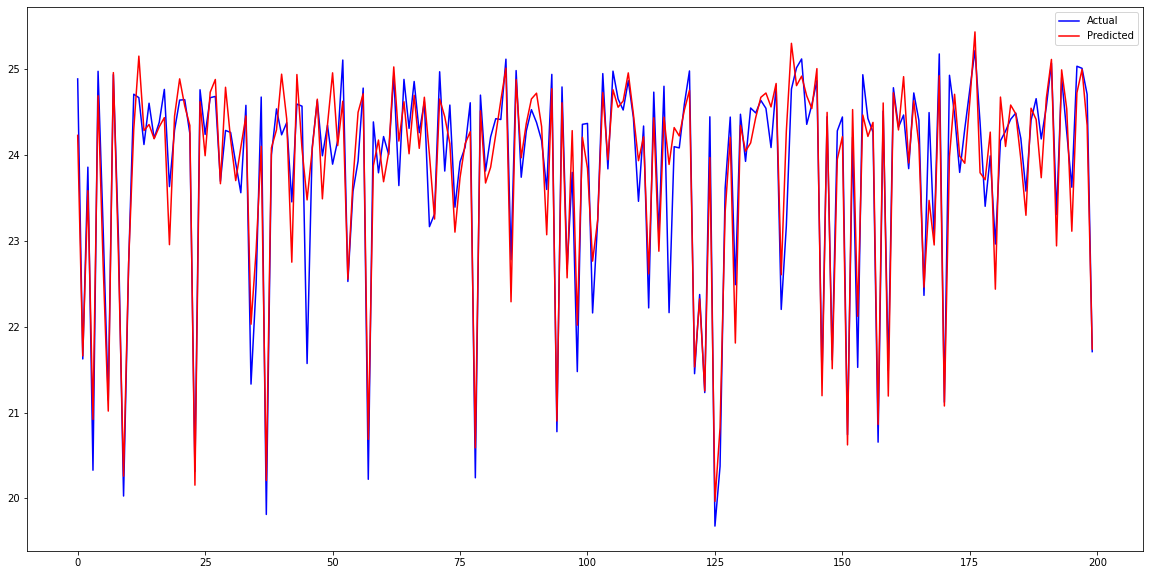

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle
import time

# Train linear regression model on training data
model = LinearRegression()
start = time.time()
model.fit(X_train, y_train)
stop = time.time()
lr_train_time = stop - start
print(f"Training time: {lr_train_time}s")

# Save the model to a pickle file
filename = '../reports/models/lr_T_conference_room_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred[:200], color='red', label='Predicted')
plt.legend()
plt.show()

##### 4.2.2 With PCA

Training time: 0.011274337768554688s
Mean squared error: 0.13248888237360457


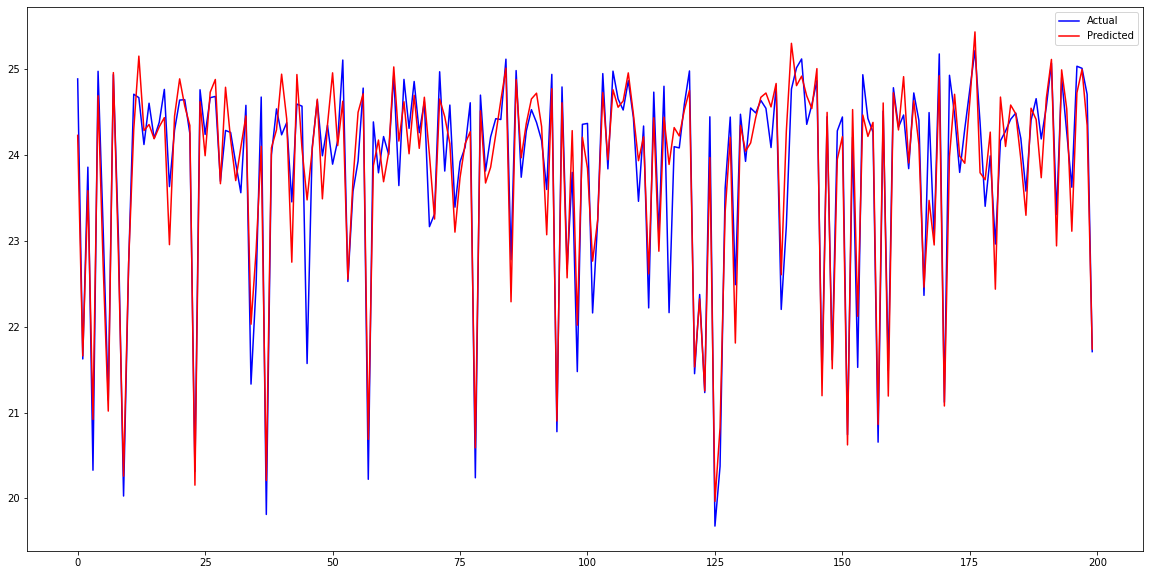

In [21]:
# Train linear regression model on training data
start = time.time()
model.fit(X_train_pca, y_train_pca)
stop = time.time()
lr_pca_train_time = stop - start
print(f"Training time: {lr_pca_train_time}s")

# Predict on test data
y_pred_pca = model.predict(X_test_pca)

# Save the model to a pickle file
filename = '../reports/models/lr_T_pca_conference_room_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred_pca)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test_pca[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_pca[:200], color='red', label='Predicted')
plt.legend()
plt.show()

#### 4.3 Train and evaluate the Feedforward Neural Network model

##### 4.2.1 Without PCA

Training time: 198.21673274040222s
INFO:tensorflow:Assets written to: ../reports/models/nn_T_conference_room_model.pkl/assets
Mean squared error: 0.028228071596030416


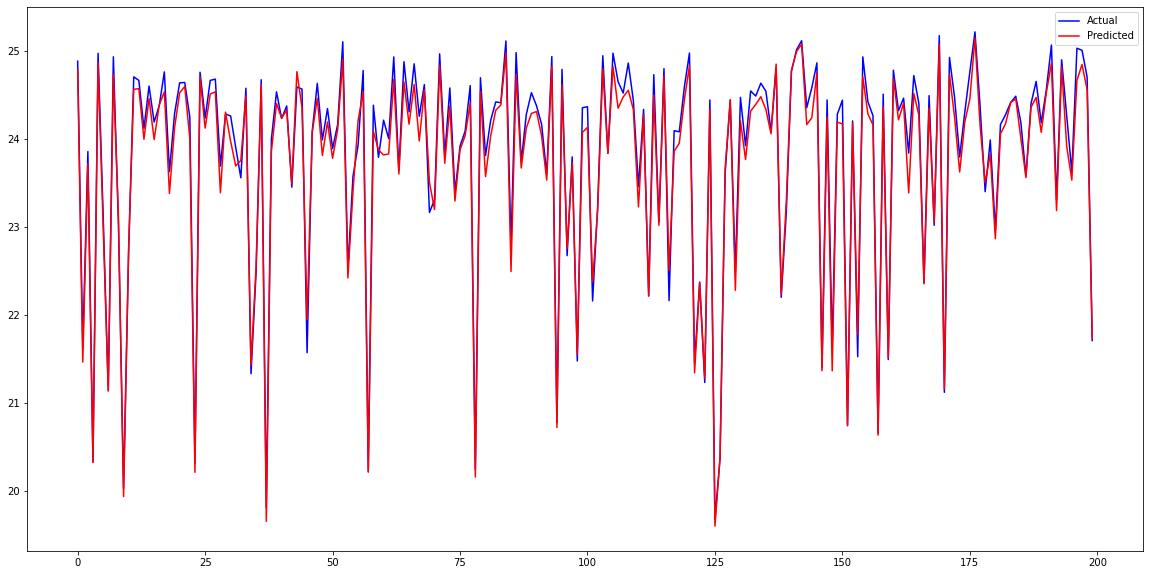

In [22]:
# Create neural network model 
from keras.models import Sequential
from keras.layers import Dense

N_NEURONS = 1024
N_LAYERS = 4

model = Sequential()
model.add(Dense(units=N_NEURONS, input_dim=X.shape[1], activation='relu'))
for i in range(N_LAYERS-1):
    model.add(Dense(units=N_NEURONS, activation='relu'))
model.add(Dense(units=1, activation='linear')) # Output layer
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
start = time.time()
model.fit(X_train, y_train, epochs=100, verbose=0)
stop = time.time()
nn_train_time = stop - start
print(f"Training time: {nn_train_time}s")

# Predict on test data
y_pred_nn = model.predict(X_test)
model.save('../reports/models/nn_T_conference_room_model.pkl')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_nn)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_nn[:200], color='red', label='Predicted')
plt.legend()
plt.show()

##### 4.3.2 With PCA

Training time: 199.61321687698364s
INFO:tensorflow:Assets written to: ../reports/models/nn_T_pca_conference_room_model.pkl/assets
Mean squared error: 0.01676264223699558


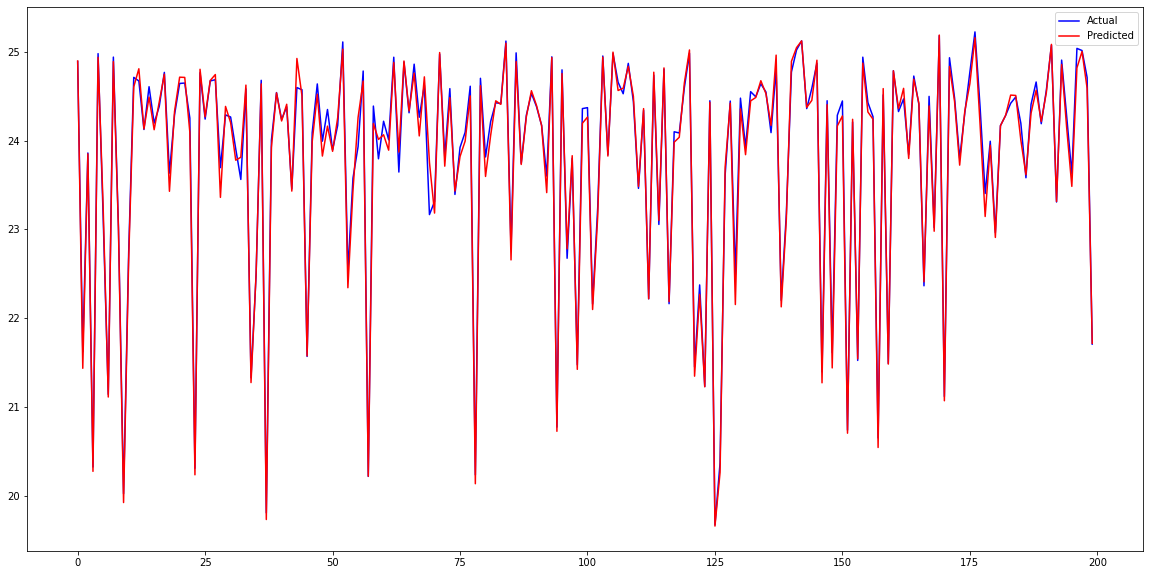

In [23]:
# Train the model
start = time.time()
model.fit(X_train_pca, y_train_pca, epochs=100, verbose=0)
stop = time.time()
nn_pca_train_time = stop - start
print(f"Training time: {nn_pca_train_time}s")

# Predict on test data
y_pred_nn_pca = model.predict(X_test_pca)
model.save('../reports/models/nn_T_pca_conference_room_model.pkl')

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred_nn_pca)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test_pca[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_nn_pca[:200], color='red', label='Predicted')
plt.legend()
plt.show()

In [24]:
# Save training times to a csv file
import csv

with open('../reports/data/training_times_conference_room_T.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model', 'Training time (s)'])
    writer.writerow(['Linear regression', lr_train_time])
    writer.writerow(['Linear regression with PCA', lr_pca_train_time])
    writer.writerow(['Neural network', nn_train_time])
    writer.writerow(['Neural network with PCA', nn_pca_train_time])

### 5. Compare models' results with and without PCA on predicting V

#### 5.1 Split the data into training and testing

In [25]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

# Without PCA
X_train, X_test, y_train, y_test = train_test_split(X_std, y_V, test_size=0.2, random_state=42)

# With PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_V, test_size=0.2, random_state=42)

#### 5.2 Train and evaluate the Linear Regression model

##### 5.2.1 Without PCA

Training time: 0.014678001403808594s
Mean squared error: 0.001118630731868217


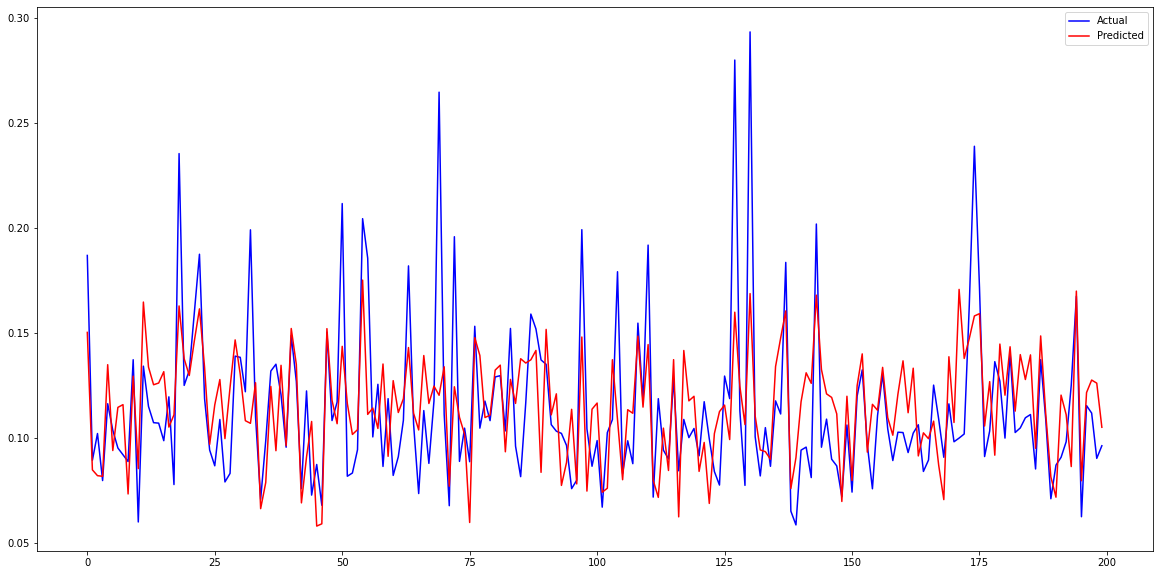

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle
import time

# Train linear regression model on training data
model = LinearRegression()
start = time.time()
model.fit(X_train, y_train)
stop = time.time()
lr_train_time = stop - start
print(f"Training time: {lr_train_time}s")

# Save the model to a pickle file
filename = '../reports/models/lr_V_conference_room_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred[:200], color='red', label='Predicted')
plt.legend()
plt.show()

##### 5.2.2 With PCA

Training time: 0.012313365936279297s
Mean squared error: 0.001118630731868217


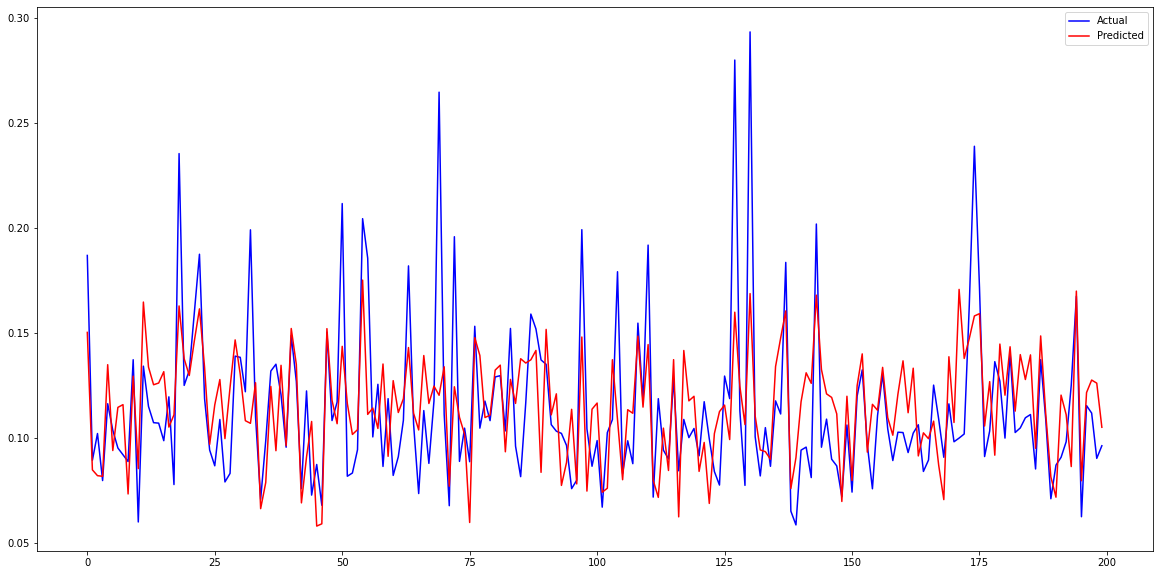

In [27]:
# Train linear regression model on training data
start = time.time()
model.fit(X_train_pca, y_train_pca)
stop = time.time()
lr_pca_train_time = stop - start
print(f"Training time: {lr_pca_train_time}s")

# Predict on test data
y_pred_pca = model.predict(X_test_pca)

# Save the model to a pickle file
filename = '../reports/models/lr_V_pca_conference_room_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred_pca)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test_pca[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_pca[:200], color='red', label='Predicted')
plt.legend()
plt.show()

#### 5.3 Train and evaluate the Feedforward Neural Network model

##### 5.2.1 Without PCA

Training time: 203.27048873901367s
INFO:tensorflow:Assets written to: ../reports/models/nn_V_conference_room_model.pkl/assets
Mean squared error: 0.0003013890718162625


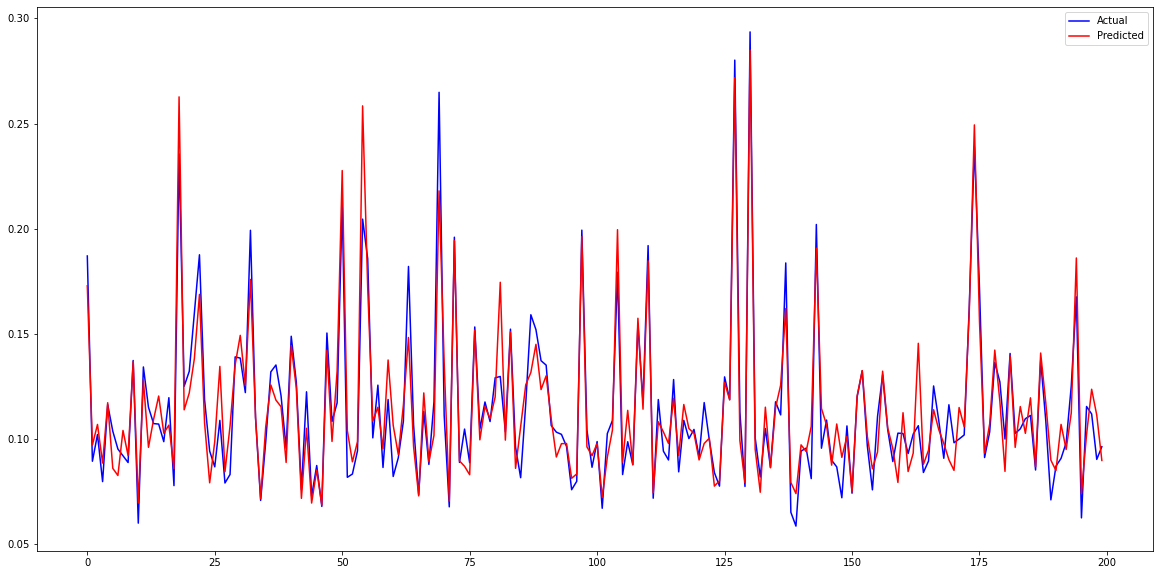

In [28]:
# Create neural network model 
from keras.models import Sequential
from keras.layers import Dense

N_NEURONS = 1024
N_LAYERS = 4

model = Sequential()
model.add(Dense(units=N_NEURONS, input_dim=X.shape[1], activation='relu'))
for i in range(N_LAYERS-1):
    model.add(Dense(units=N_NEURONS, activation='relu'))
model.add(Dense(units=1, activation='linear')) # Output layer
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
start = time.time()
model.fit(X_train, y_train, epochs=100, verbose=0)
stop = time.time()
nn_train_time = stop - start
print(f"Training time: {nn_train_time}s")

# Predict on test data
y_pred_nn = model.predict(X_test)
model.save('../reports/models/nn_V_conference_room_model.pkl')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_nn)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_nn[:200], color='red', label='Predicted')
plt.legend()
plt.show()

##### 5.3.2 With PCA

Training time: 193.58191180229187s
INFO:tensorflow:Assets written to: ../reports/models/nn_V_pca_conference_room_model.pkl/assets
Mean squared error: 0.00030001247540154495


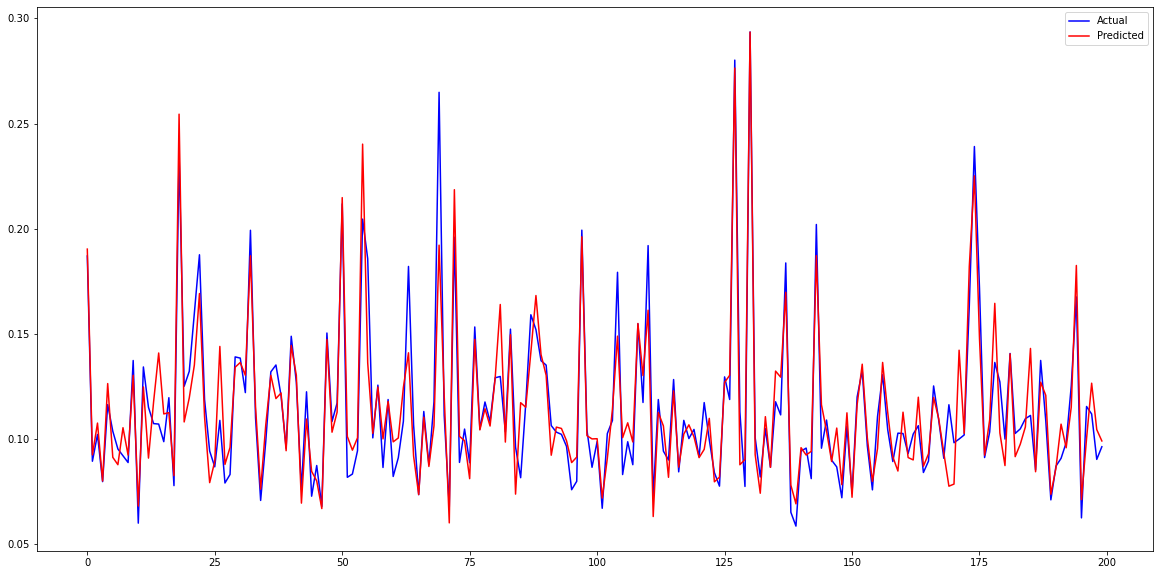

In [29]:
# Train the model
start = time.time()
model.fit(X_train_pca, y_train_pca, epochs=100, verbose=0)
stop = time.time()
nn_pca_train_time = stop - start
print(f"Training time: {nn_pca_train_time}s")

# Predict on test data
y_pred_nn_pca = model.predict(X_test_pca)
model.save('../reports/models/nn_V_pca_conference_room_model.pkl')

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred_nn_pca)
print(f'Mean squared error: {mse}')

# Plot the predictions and actual values
plt.figure(figsize=(20,10))
plt.plot(range(200), y_test_pca[:200], color='blue', label='Actual')
plt.plot(range(200), y_pred_nn_pca[:200], color='red', label='Predicted')
plt.legend()
plt.show()

In [30]:
# Save training times to a csv file
import csv

with open('../reports/data/training_times_conference_room_V.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Model', 'Training time (s)'])
    writer.writerow(['Linear regression', lr_train_time])
    writer.writerow(['Linear regression with PCA', lr_pca_train_time])
    writer.writerow(['Neural network', nn_train_time])
    writer.writerow(['Neural network with PCA', nn_pca_train_time])